#  Approximations of Random Numbers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Psuedorandom Number Generator

This cell is an example of a psuedorandom number generator. It isn't completely random, but without knowledge of the current state and function it is able to create a seemingly random uniform distribution.

It works by starting from a seed value, then multiplying the current number by 3 and taking only the decimal component. This results in a number between 0 and 1 that doesn't favor any part of the range.

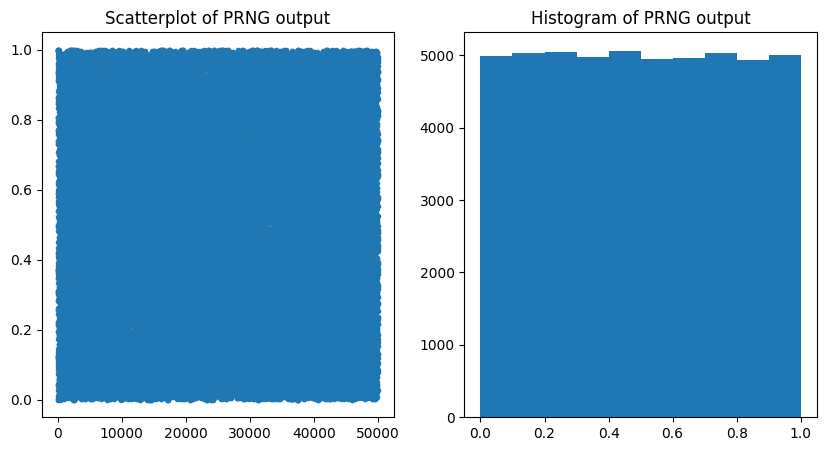

In [ ]:
current_point = 0.12345          # seed value
points_to_save = np.zeros(50000,)  # initialize an array of zeros

for i in range(points_to_save.shape[0]):
    current_point = 3*current_point % 1      # update x and store the value in X
    points_to_save[i] = current_point

_,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(points_to_save, '.')     # plot the values in X
ax[1].hist(points_to_save)
ax[0].set_title('Scatterplot of PRNG output')
ax[1].set_title('Histogram of PRNG output')
plt.show()


The `coin()` function is an example of an application of a PRNG. It returns either 1 or -1 for heads or tails.

In [ ]:
def coin():
    return 2*(np.random.random() > 0.5) - 1

In [ ]:
coin()

1

To show how the distribution behaves randomly, this cell runs `M` simulations of coins being flipped `N` times and marks down the total. The histogram of the output shows that this distribution forms a bell curve shape.

In [ ]:
M = 10000
N = 100

X = np.zeros(M,)

for j in range(M):

    x = 0

    for i in range(N):
        x = x + coin()

    X[j] = x

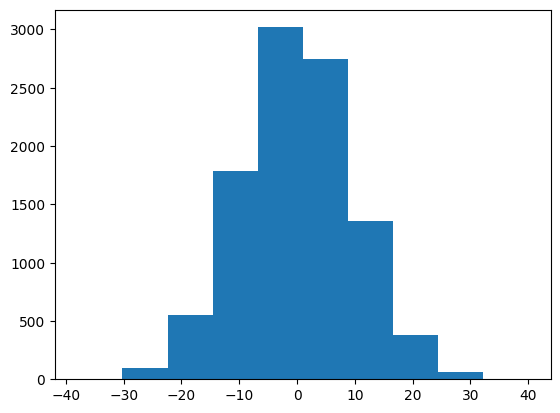

In [ ]:
plt.hist(X)
plt.show()

## Bonus: Pascal's Triangle

Using loops, this cell calculates the first 12 rows of Pascal's Triangle. It iterates over every row, then every column to add the two adjacent values to the lower row.

In [ ]:
P = np.zeros((12,18))

P[0,5]=1

for i in range(1,P.shape[0]):

    for j in range(1,P.shape[1]-1):

        P[i,j] = P[i-1,j-1]+P[i-1,j]

print(P[:,5:])

[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   3.   3.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   4.   6.   4.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   5.  10.  10.   5.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   6.  15.  20.  15.   6.   1.   0.   0.   0.   0.   0.   0.]
 [  1.   7.  21.  35.  35.  21.   7.   1.   0.   0.   0.   0.   0.]
 [  1.   8.  28.  56.  70.  56.  28.   8.   1.   0.   0.   0.   0.]
 [  1.   9.  36.  84. 126. 126.  84.  36.   9.   1.   0.   0.   0.]
 [  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.   0.   0.]
 [  1.  11.  55. 165. 330. 462. 462. 330. 165.  55.  11.   1.   0.]]


## Normal Distribution

To provide an example of sampling from a normal distribution, this cell will sample an amount of numbers from a distribution of custom mean and standard deviation. They are then plotted in a histogram to show the approximate original distribution.

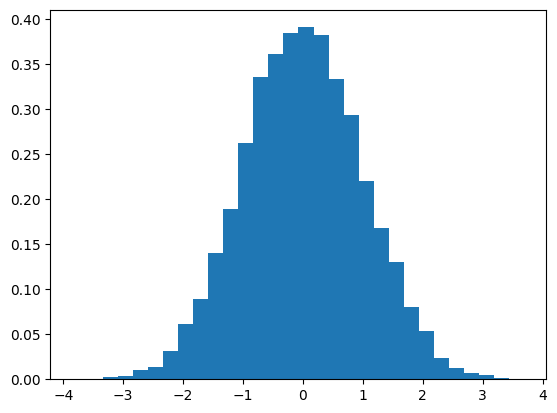

In [ ]:
mean = 0
std_dev = 1

sample_size = 10000
data_points = np.random.normal(mean, std_dev, sample_size)

hist_count, x, ignored = plt.hist(data_points, 30, density=True)

The normal distribution is a Gaussian function. The base Gaussian, shown below, demonstrates the bell curve shape.

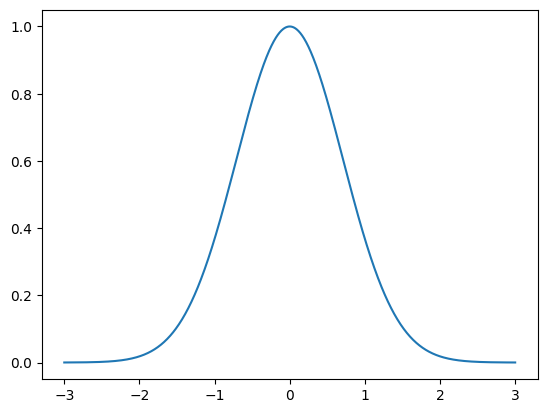

In [ ]:
x = np.linspace(-3,3,1000)
y = np.exp(-x**2)
plt.plot(x,y)
plt.show()

Combining the two above cells, this demonstrates both sampling a normal distribution to get random numbers and how it conforms to the shape of the distribution itself; the below plot shows the histogram of sampled numbers, in blue, and the original normal distribution in red.

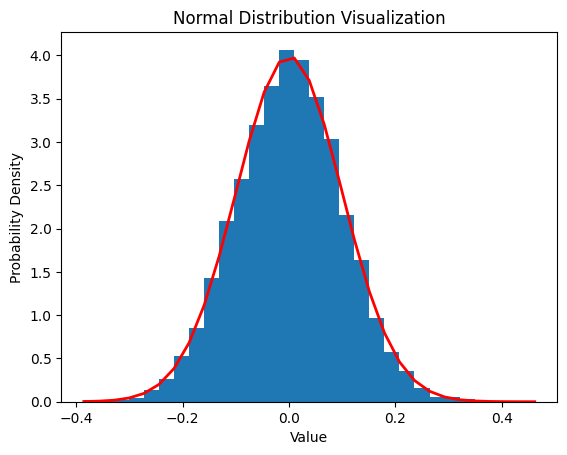

In [ ]:
# Define the parameters for the normal distribution
mean = 0  # Mean (mu) of the distribution
std_dev = 0.1  # Standard deviation (sigma) of the distribution

# Generate 1000 data points following a normal distribution with the specified mean and standard deviation
sample_size = 10000
data_points = np.random.normal(mean, std_dev, sample_size)

# Plot the histogram of the data points
bins_number = 30  # Number of bins for the histogram
hist_count, x, ignored = plt.hist(data_points, bins_number, density=True)

# Plot the probability density function of the normal distribution
normal_dist_curve = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * std_dev ** 2))
plt.plot(x, normal_dist_curve, linewidth=2, color='r')

# Set the title and labels for the plot
plt.title('Normal Distribution Visualization')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Display the plot
plt.show()

## Basic Statistics in Code

Below are some examples of potential visualizations of data from random numbers.

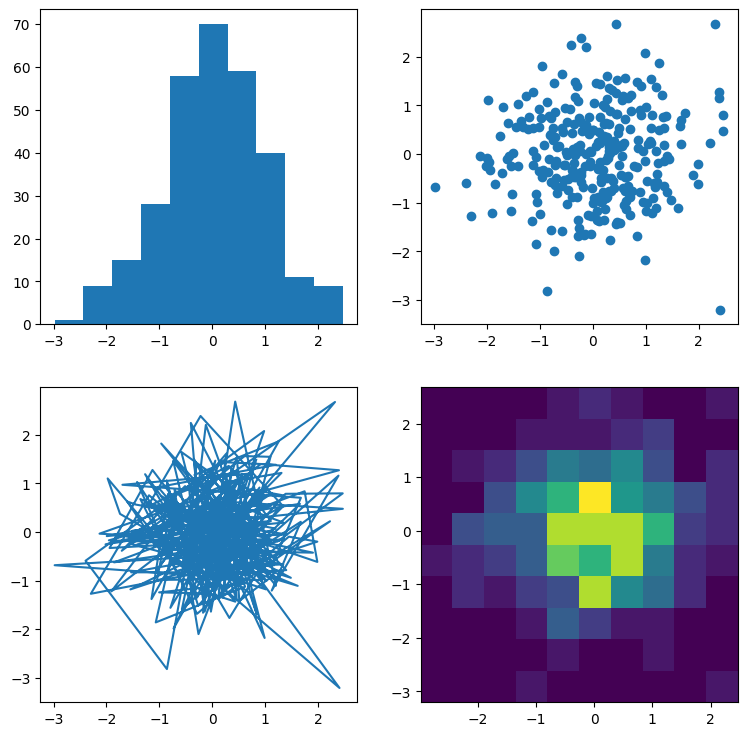

In [ ]:
np.random.seed(10)
data = np.random.randn(2, 300)

plt.figure(1, figsize=(9, 9))

plt.subplot(2,2,1)
plt.hist(data[0])

plt.subplot(2,2,2)
plt.scatter(data[0], data[1])

plt.subplot(2,2,3)
plt.plot(data[0], data[1],'-')

plt.subplot(2,2,4)
plt.hist2d(data[0], data[1])

plt.show()

### Statistical Functions

In [ ]:
def mean(x): # Calculates the mean of a vector by adding all numbers and dividing by the amount of them.
    return np.sum(x)/x.shape[0]

In [ ]:
def var(x): # Calculates the variance of a vector by taking the mean of mean square distance for each point.
    return mean((x - mean(x))**2)

In [ ]:
def std(x): # Calculates the standard deviation by taking the square root of a vector's variance.
    return np.sqrt(var(x))

In [ ]:
def median(x): # Calculates the median by sorting the input vector and returning the middlemost value, or average of the two middlemost values.
    n = len(x)
    sorted_x = np.sort(x)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_x[mid - 1] + sorted_x[mid]) / 2
    else:
        return sorted_x[mid]

In [ ]:
def mode(x): # Calculates the mode of a vector by returning the most common unique item.
    values, counts = np.unique(x, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

In [ ]:
def range1(x): # Calculates the range of a vector by subtracting the minimum from the maximum.
    return np.max(x) - np.min(x)

In [ ]:
data = np.array([1, 2, 2, 3, 4, 5, 5, 5, 6])

# Testing the functions
mean_value = mean(data)
var_value = var(data)
std_value = std(data)
median_value = median(data)
mode_value = mode(data)
range_value = range1(data)

print(mean_value, var_value, std_value, median_value, mode_value, range_value)


3.6666666666666665 2.6666666666666665 1.632993161855452 4 5 5


## Monte Carlo Simulating: Esimating π using random numbers

Monte Carlo Simulation is an advanced application of random numbers. By simply randomly placing points on a square plane and calculating the distance from each to a relevant point, numbers such as pi can be estimated.

The working principle of this is fairly simple. A random point on the plane will either be within an inscribed circle, or not. The fraction of points inside the circle should be the same as the fraction of the circle's area to the plane's.

Since the plane has an area of 4, and the circle an area of pi, the amount of points within the inscribed circle divided by the total amount of points should be pi/4. Multiplying that by 4 gives a rough estimation of pi.

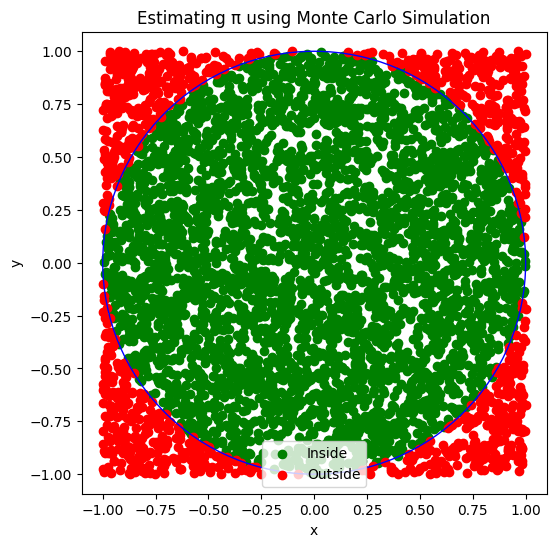

π estimate: 3.1408


In [ ]:
# Number of random points to generate
num_points = 5000

# Generating random points
x_points = np.random.uniform(-1, 1, num_points)
y_points = np.random.uniform(-1, 1, num_points)

# Calculating the number of points inside the quarter circle
points_inside = np.sqrt(x_points**2 + y_points**2) <= 1
num_inside = np.sum(points_inside)

# Estimating π
pi_estimate = 4 * num_inside / num_points

# Plotting the points and the quarter circle
plt.figure(figsize=(6, 6))
plt.scatter(x_points[points_inside], y_points[points_inside], color='green', label='Inside')
plt.scatter(x_points[~points_inside], y_points[~points_inside], color='red', label='Outside')
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)
plt.title('Estimating π using Monte Carlo Simulation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()

print('π estimate:',pi_estimate)

### $e$ from Random Numbers

$e$ can also be caluclated with random numbers. Instead of Monte Carlo Simulation used before, $e$ is calculated by taking the average point at which a sum of random numbers exceeds 1; this
converges at $e-1$, and yields a fairly accurate calculation with 3 decimals of precision.

In [ ]:
X = np.random.random((10000000,10))
Y = np.cumsum(X,1)
Z = np.argmax(Y > 1,1) + 1
print(np.mean(Z))

2.7189294


## Quantum Random Numbers API

While this lab focuses on pseudorandom numbers and their applications, true random numbers are a valuable commodity. The example below sells true random numbers found from the unpredictable nature of quantum mechanics.

https://aws.amazon.com/marketplace/pp/prodview-246kyrfjo3bag